In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import FCPython
%matplotlib inline

In [2]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
with open('/Users/sidthakur08/ML/Code/Soccer/wyscout/events/events_England.json') as f:
    data = json.load(f)

In [4]:
train = pd.DataFrame(data)
train.columns

Index(['eventId', 'eventName', 'eventSec', 'id', 'matchId', 'matchPeriod',
       'playerId', 'positions', 'subEventId', 'subEventName', 'tags',
       'teamId'],
      dtype='object')

In [5]:
train.head()

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
0,8,Pass,2.758649,177959171,2499719,1H,25413,"[{'y': 49, 'x': 49}, {'y': 78, 'x': 31}]",85,Simple pass,[{'id': 1801}],1609
1,8,Pass,4.946850,177959172,2499719,1H,370224,"[{'y': 78, 'x': 31}, {'y': 75, 'x': 51}]",83,High pass,[{'id': 1801}],1609
2,8,Pass,6.542188,177959173,2499719,1H,3319,"[{'y': 75, 'x': 51}, {'y': 71, 'x': 35}]",82,Head pass,[{'id': 1801}],1609
3,8,Pass,8.143395,177959174,2499719,1H,120339,"[{'y': 71, 'x': 35}, {'y': 95, 'x': 41}]",82,Head pass,[{'id': 1801}],1609
4,8,Pass,10.302366,177959175,2499719,1H,167145,"[{'y': 95, 'x': 41}, {'y': 88, 'x': 72}]",85,Simple pass,[{'id': 1801}],1609


In [6]:
train['positions'][0]

[{'y': 49, 'x': 49}, {'y': 78, 'x': 31}]

In [7]:
pd.unique(train['subEventName'])

array(['Simple pass', 'High pass', 'Head pass', 'Air duel',
       'Ground loose ball duel', 'Smart pass', 'Launch',
       'Ground defending duel', 'Ground attacking duel', 'Foul',
       'Free Kick', 'Cross', 'Shot', 'Reflexes', 'Touch', 'Clearance',
       'Ball out of the field', 'Throw in', 'Goal kick', 'Corner',
       'Goalkeeper leaving line', 'Hand pass', 'Acceleration',
       'Save attempt', '', 'Free kick cross', 'Free kick shot',
       'Hand foul', 'Violent Foul', 'Protest', 'Whistle',
       'Late card foul', 'Out of game foul', 'Penalty', 'Time lost foul',
       'Simulation'], dtype=object)

In [5]:
shots = train[train['subEventName']=='Shot']
shots_model = pd.DataFrame(columns = ['Goal','X','Y'])

In [9]:
shots['tags'].head()

46     [{'id': 101}, {'id': 402}, {'id': 201}, {'id':...
62     [{'id': 401}, {'id': 201}, {'id': 1211}, {'id'...
91     [{'id': 101}, {'id': 403}, {'id': 201}, {'id':...
128    [{'id': 401}, {'id': 201}, {'id': 1215}, {'id'...
249    [{'id': 402}, {'id': 201}, {'id': 1205}, {'id'...
Name: tags, dtype: object

In [6]:
for i,shot in shots.iterrows():
    header = 0
    for shottags in shot['tags']:
        if shottags['id']==403: # tag id for headers
            header = 1

    if not(header):
        shots_model.at[i,'X'] = 100-shot['positions'][0]['x']
        shots_model.at[i,'Y'] = shot['positions'][0]['y']
        shots_model.at[i,'C'] = abs(shot['positions'][0]['y']-50)

        x = shots_model.at[i,'X']*105/100
        y = shots_model.at[i,'C']*65/100
        shots_model.at[i,'Distance'] = np.sqrt(x**2+y**2)
        a = np.arctan(7.32*x/(x**2+y**2-(7.32/2)**2))
        if a<0:
            a = np.pi+a
        shots_model.at[i,'Angle'] = a

        shots_model.at[i,'Goal'] = 0
        for shottags in shot['tags']:
            if shottags['id']==101:
                shots_model.at[i,'Goal']=1

In [11]:
shots_model.head()

,Goal,X,Y,C,Distance,Angle
46,1,12.0,41,9.0,13.891814,0.474451
62,0,15.0,52,2.0,15.803560,0.453823
128,0,19.0,33,17.0,22.805811,0.280597
249,0,25.0,30,20.0,29.292704,0.223680
394,0,10.0,39,11.0,12.703248,0.479051


In [7]:
H_shot = np.histogram2d(shots_model['X'],shots_model['Y'],bins=50,range=[[0,100],[0,100]])
goals_only = shots_model[shots_model['Goal']==1]
H_goal = np.histogram2d(goals_only['X'],goals_only['Y'],bins=50,range=[[0,100],[0,100]])

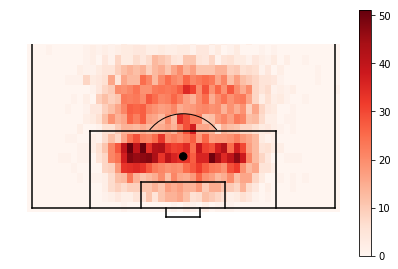

In [8]:
#plotting number of shots from different points
(fig,ax) = FCPython.createGoalMouth()
pos = ax.imshow(H_shot[0],extent=[-1,66,104,-1],aspect='auto',cmap=plt.cm.Reds)
fig.colorbar(pos,ax=ax)
plt.xlim((-1,66))
plt.ylim((-3,35))
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()
fig.savefig('NumberOfShots.pdf', dpi=None, bbox_inches="tight")

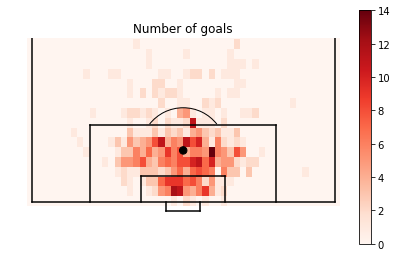

In [9]:
#Plot the number of GOALS from different points
(fig,ax) = FCPython.createGoalMouth()
pos=ax.imshow(H_goal[0], extent=[-1,66,104,-1], aspect='auto',cmap=plt.cm.Reds)
fig.colorbar(pos, ax=ax)
ax.set_title('Number of goals')
plt.xlim((-1,66))
plt.ylim((-3,35))
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()
fig.savefig('NumberOfGoals.pdf', dpi=None, bbox_inches="tight")

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


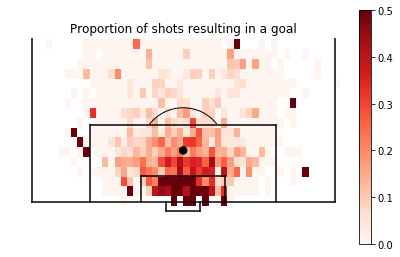

In [10]:
#Plot the probability of scoring from different points
(fig,ax) = FCPython.createGoalMouth()
pos=ax.imshow(H_goal[0]/H_shot[0], extent=[-1,66,104,-1], aspect='auto',cmap=plt.cm.Reds,vmin=0, vmax=0.5)
fig.colorbar(pos, ax=ax)
ax.set_title('Proportion of shots resulting in a goal')
plt.xlim((-1,66))
plt.ylim((-3,35))
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()
fig.savefig('ProbabilityOfScoring.pdf', dpi=None, bbox_inches="tight")

In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import seaborn as sns
#from sklearn.gaussian_process import GaussianProcessClassifier
#from sklearn.ensemble import AdaBoostClassifier
#from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [66]:
def plot_cm(y_true, y_pred, title, figsize=(7,6)):
    y_pred = y_pred.round().astype(int)
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    plt.title(title)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)

In [33]:
shots_model

,Goal,X,Y,C,Distance,Angle
46,1,12.0,41,9.0,13.891814,0.474451
62,0,15.0,52,2.0,15.803560,0.453823
128,0,19.0,33,17.0,22.805811,0.280597
249,0,25.0,30,20.0,29.292704,0.223680
394,0,10.0,39,11.0,12.703248,0.479051
401,0,31.0,36,14.0,33.798114,0.208004
493,0,14.0,58,8.0,15.592626,0.438037
514,0,10.0,32,18.0,15.720687,0.317684
519,0,27.0,36,14.0,29.774696,0.233345
554,1,6.0,54,4.0,6.815424,0.948906


In [80]:
x = shots_model.loc[:,['Distance','Angle']].astype(int)
y = shots_model.loc[:,'Goal'].astype(int)

In [85]:
names = ["Logistic Regression","Linear SVM", "RBF SVM", "Decision Tree","Random Forest","Naive Bayes", "QDA"]

classifiers = [
    LogisticRegressionCV(cv=10),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=500, max_features=1),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

In [86]:
def acc_no_scale(x,y):
    x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0,test_size=0.3)
    for name,clf in zip(names,classifiers):
        print(name)
        print(clf)
        clf.fit(x_train,y_train)
        y_pred = clf.predict(x_test)
        print(clf.score(x_test,y_test))
        plot_cm(y_test,y_pred,name)

Logistic Regression
LogisticRegressionCV(Cs=10, class_weight=None, cv=10, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)
0.9051844932274637
Linear SVM
SVC(C=0.025, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
0.8986454927603923
RBF SVM
SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=2, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
0.9009808500700607
Decision Tree
DecisionTreeClassifier(ccp_alpha=0.0, c

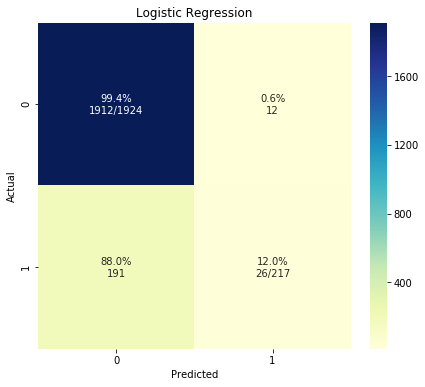

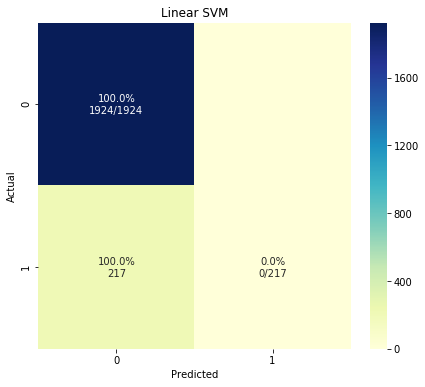

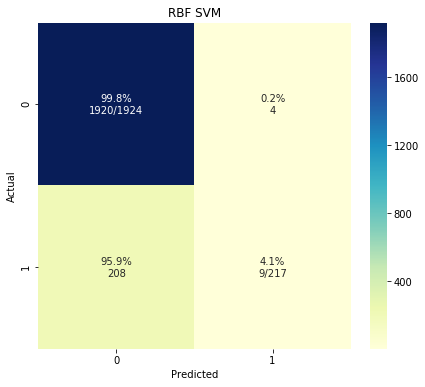

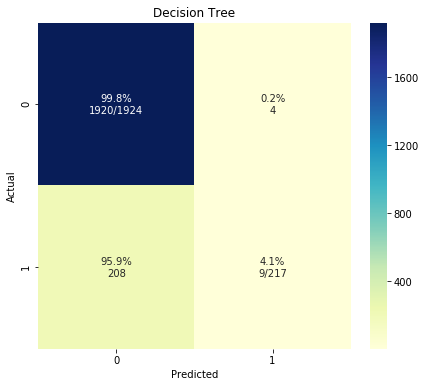

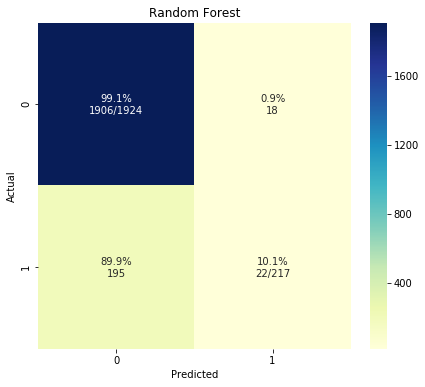

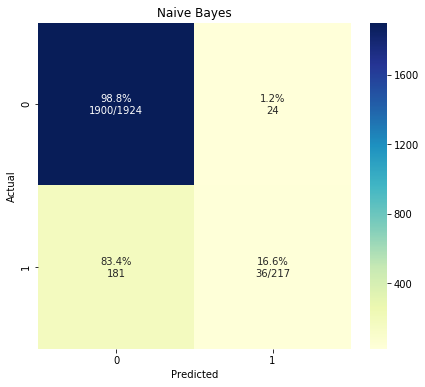

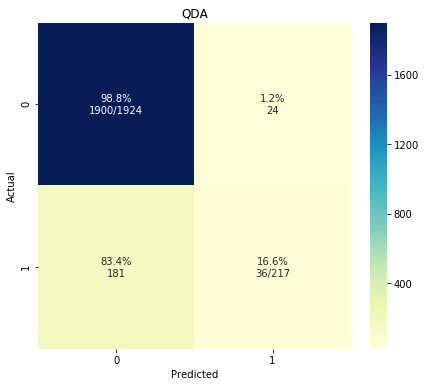

In [87]:
acc_no_scale(x,y)

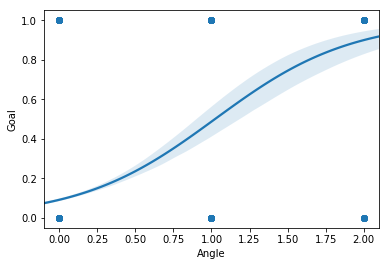

In [96]:
sns.regplot(x['Angle'],y['Goal'],logistic=True)

In [11]:
# using statsmodels module
test_model = smf.glm(formula="Goal ~ Angle+Distance" , data=shots_model, 
                           family=sm.families.Binomial()).fit()
print(test_model.summary())

                   Generalized Linear Model Regression Results                    
Dep. Variable:     ['Goal[0]', 'Goal[1]']   No. Observations:                 7134
Model:                                GLM   Df Residuals:                     7131
Model Family:                    Binomial   Df Model:                            2
Link Function:                      logit   Scale:                          1.0000
Method:                              IRLS   Log-Likelihood:                -1990.9
Date:                    Sun, 17 May 2020   Deviance:                       3981.8
Time:                            11:32:43   Pearson chi2:                 9.02e+03
No. Iterations:                         7                                         
Covariance Type:                nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   

In [12]:
b= test_model.params
model_var = ['Angle','Distance']
#Return xG value for more general model
def calculate_xG(sh):    
   bsum=b[0]
   for i,v in enumerate(model_var):
       bsum=bsum+b[i+1]*sh[v]
   xG = 1/(1+np.exp(bsum)) 
   return xG   

#Add an xG to my dataframe
xG=shots_model.apply(calculate_xG, axis=1) 
shots_model = shots_model.assign(xG=xG)

In [13]:
shots_model

,Goal,X,Y,C,Distance,Angle,xG
46,1,12.0,41,9.0,13.891814,0.474451,0.136206
62,0,15.0,52,2.0,15.803560,0.453823,0.109910
128,0,19.0,33,17.0,22.805811,0.280597,0.042472
249,0,25.0,30,20.0,29.292704,0.223680,0.019304
394,0,10.0,39,11.0,12.703248,0.479051,0.153687
401,0,31.0,36,14.0,33.798114,0.208004,0.011421
493,0,14.0,58,8.0,15.592626,0.438037,0.110228
514,0,10.0,32,18.0,15.720687,0.317684,0.094395
519,0,27.0,36,14.0,29.774696,0.233345,0.018523
554,1,6.0,54,4.0,6.815424,0.948906,0.396730


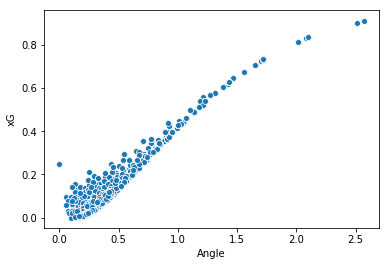

In [16]:
import seaborn as sns
anglePlot = sns.scatterplot(shots_model['Angle'],shots_model['xG'])
fig = anglePlot.get_figure()
fig.savefig('xGxAngle.pdf')

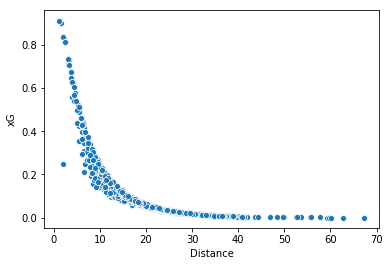

In [17]:
distPlot = sns.scatterplot(shots_model['Distance'],shots_model['xG'])
fig = distPlot.get_figure()
fig.savefig('xGxDist.pdf')

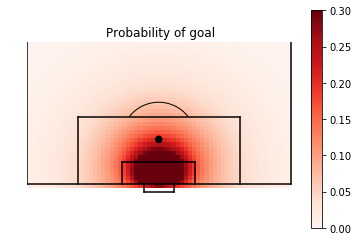

In [18]:
#Create a 2D map of xG
pgoal_2d=np.zeros((65,65))
for x in range(65):
    for y in range(65):
        sh=dict()
        a = np.arctan(7.32 *x /(x**2 + abs(y-65/2)**2 - (7.32/2)**2))
        if a<0:
            a = np.pi + a
        sh['Angle'] = a
        sh['Distance'] = np.sqrt(x**2 + abs(y-65/2)**2)
        sh['D2'] = x**2 + abs(y-65/2)**2
        sh['X'] = x
        sh['AX'] = x*a
        sh['X2'] = x**2
        sh['C'] = abs(y-65/2)
        sh['C2'] = (y-65/2)**2
        
        pgoal_2d[x,y] =  calculate_xG(sh)

(fig,ax) = FCPython.createGoalMouth()
pos=ax.imshow(pgoal_2d, extent=[-1,65,65,-1], aspect='auto',cmap=plt.cm.Reds,vmin=0, vmax=0.3)
fig.colorbar(pos, ax=ax)
ax.set_title('Probability of goal')
plt.xlim((0,66))
plt.ylim((-3,35))
plt.gca().set_aspect('equal', adjustable='box')
plt.show()
fig.savefig('goalprobfor_Angle + Distance.pdf', dpi=None, bbox_inches="tight")   